# 1. Mettre en place notre environnement
________

La première chose que nous devons faire est de charger les bibliothèques et les ensembles de données que nous allons utiliser. Pour aujourd'hui, nous allons travailler avec deux ensembles de données : un contenant des chroniques de température dans le lit de la rivière (zone hyporhéique), et un autre contenant des les chroniques de différence de charge enregistré en **Volt**.

**Important!** Assurez-vous d'exécuter cette cellule vous-même ou le reste de votre code ne fonctionnera pas

In [1]:
# modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# read in our data
capteur_riviere = pd.read_csv("/Users/jiangxinbei/Desktop/MOLONARI_1D_RESOURCES-main/sampling_points/Point034/point034_P_measures.csv",header=1)
capteur_ZH = pd.read_csv("/Users/jiangxinbei/Desktop/MOLONARI_1D_RESOURCES-main/sampling_points/Point034/point034_T_measures.csv",header=1)
etalonage_capteur_riv = pd.read_csv("/Users/jiangxinbei/Desktop/MOLONARI_1D_RESOURCES-main/configuration/pressure_sensors/P508.csv")

# set seed for reproducibility
np.random.seed(0)

Nous sommes maintenant prêts à examiner quelques dates ! (Si vous le souhaitez, vous pouvez profiter de cette occasion pour jeter un coup d'œil à certaines des données).

# 2 Visualisation des données brutes

## 2.1 Imprimez le noms des colonnes
renommer les colonnes du fichier capteur_riviere :  	dates,tension_V,temperature_stream_C et celles du fichier capteur_ZH  :
#,dates,temperature_depth_1_C,temperature_depth_2_C,temperature_depth_3_C,temperature_depth_4_C



In [2]:
capteur_riviere.rename(columns={'#': '#', list(capteur_riviere.columns)[1]: 'dates',list(capteur_riviere.columns)[2]: 'tension_V',
                                list(capteur_riviere.columns)[3]:'temperature_stream_C'}, inplace =  True)
capteur_riviere.head()

,#,dates,tension_V,temperature_stream_C,Hôte connecté (LGR S/N: 10831978),Arrêté (LGR S/N: 10831978),Fin de fichier (LGR S/N: 10831978)
0,1.0,06/27/16 12:00:00 PM,1.26787,18.342,NaN,NaN,NaN
1,2.0,06/27/16 12:15:00 PM,1.06630,13.898,NaN,NaN,NaN
2,3.0,06/27/16 12:30:00 PM,1.20661,13.915,NaN,NaN,NaN
3,4.0,06/27/16 12:45:00 PM,1.24533,13.939,NaN,NaN,NaN
4,5.0,06/27/16 01:00:00 PM,1.24437,13.967,NaN,NaN,NaN


In [3]:
capteur_ZH.rename(columns={'#': '#', list(capteur_ZH.columns)[1]: 'dates', list(capteur_ZH.columns)[2]: 'temperature_depth_1_C',
                           list(capteur_ZH.columns)[3]:'temperature_depth_2_C', list(capteur_ZH.columns)[4]:'temperature_depth_3_C',
                           list(capteur_ZH.columns)[5]:'temperature_depth_4_C'}, inplace =  True)
capteur_ZH.head()

,#,dates,temperature_depth_1_C,temperature_depth_2_C,temperature_depth_3_C,temperature_depth_4_C,Hôte connecté (LGR S/N: 10117166),Arrêté (LGR S/N: 10117166),Fin de fichier (LGR S/N: 10117166)
0,1,06/27/16 12:00:00 PM,13.810,13.834,13.858,13.810,NaN,NaN,NaN
1,2,06/27/16 12:15:00 PM,13.834,13.858,13.882,13.834,NaN,NaN,NaN
2,3,06/27/16 12:30:00 PM,13.930,13.954,14.050,14.002,NaN,NaN,NaN
3,4,06/27/16 12:45:00 PM,13.882,13.954,14.026,13.954,NaN,NaN,NaN
4,5,06/27/16 01:00:00 PM,13.858,13.930,14.026,13.954,NaN,NaN,NaN


## 2.2 Réaliser un plot des données des deux fichiers

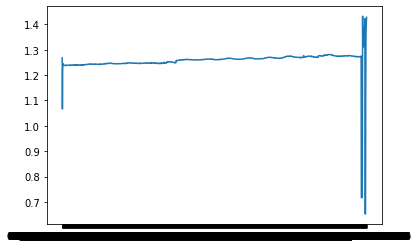

In [4]:
plt.plot(capteur_riviere['dates'],capteur_riviere['tension_V'])
plt.show()

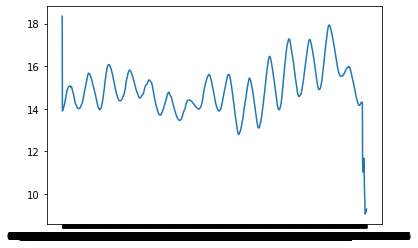

In [5]:
plt.plot(capteur_riviere['dates'],capteur_riviere['temperature_stream_C'])
plt.show()

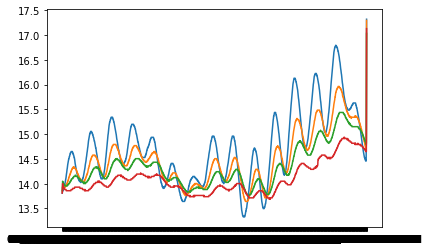

In [6]:
plt.plot(capteur_ZH['dates'],capteur_ZH['temperature_depth_1_C'])
plt.plot(capteur_ZH['dates'],capteur_ZH['temperature_depth_2_C'])
plt.plot(capteur_ZH['dates'],capteur_ZH['temperature_depth_3_C'])
plt.plot(capteur_ZH['dates'],capteur_ZH['temperature_depth_4_C'])
plt.show()

# 3 Transformez les données de différence de charge en mètres

Rappel : U = U0 + alpha * dH + beta * T

In [7]:
capteur_riviere['tension_V']=pd.to_numeric(capteur_riviere['tension_V'], errors  ='coerce')
capteur_riviere['temperature_stream_C']=pd.to_numeric(capteur_riviere['temperature_stream_C'], errors  ='coerce')

capteur_riviere['diff_charge'] = (capteur_riviere['tension_V'] - capteur_riviere['temperature_stream_C']*(0.001474) - 1.210344)/(-1.462495)

In [8]:
capteur_riviere.head()

,#,dates,tension_V,temperature_stream_C,Hôte connecté (LGR S/N: 10831978),Arrêté (LGR S/N: 10831978),Fin de fichier (LGR S/N: 10831978),diff_charge
0,1.0,06/27/16 12:00:00 PM,1.26787,18.342,NaN,NaN,NaN,-0.020848
1,2.0,06/27/16 12:15:00 PM,1.06630,13.898,NaN,NaN,NaN,0.112499
2,3.0,06/27/16 12:30:00 PM,1.20661,13.915,NaN,NaN,NaN,0.016578
3,4.0,06/27/16 12:45:00 PM,1.24533,13.939,NaN,NaN,NaN,-0.009873
4,5.0,06/27/16 01:00:00 PM,1.24437,13.967,NaN,NaN,NaN,-0.009189


# 4. Traitement des dates
## 4.1 Vérifiez le type de données de notre colonne de date
___

Imprimer les dates des deux fichiers

In [9]:
print (capteur_riviere['dates'])

0       06/27/16 12:00:00 PM
1       06/27/16 12:15:00 PM
2       06/27/16 12:30:00 PM
3       06/27/16 12:45:00 PM
4       06/27/16 01:00:00 PM
                ...         
1455        07/12/2016 15:45
1456        07/12/2016 16:00
1457        07/12/2016 16:15
1458        07/12/2016 16:30
1459        07/12/2016 16:45
Name: dates, Length: 1460, dtype: object


In [10]:
print (capteur_ZH['dates'])

0       06/27/16 12:00:00 PM
1       06/27/16 12:15:00 PM
2       06/27/16 12:30:00 PM
3       06/27/16 12:45:00 PM
4       06/27/16 01:00:00 PM
                ...         
1433    07/12/16 10:15:00 AM
1434    07/12/16 10:30:00 AM
1435    07/12/16 10:45:00 AM
1436    07/12/16 10:49:31 AM
1437    07/12/16 10:49:47 AM
Name: dates, Length: 1438, dtype: object


Remarquez qu'en bas de la sortie de `head()`, vous pouvez voir qu'il est dit que le type de données de cette colonne est "object". 

> Pandas utilise le dtype "object" pour stocker différents types de données, mais le plus souvent, lorsque vous voyez une colonne avec le dtype "object", elle contient des chaînes de caractères. 

Si vous consultez la documentation sur le dtype de Pandas [ici] (http://pandas.pydata.org/pandas-docs/stable/basics.html#dtypes), vous remarquerez qu'il existe également un dtype spécifique `datetime64`. Comme le dtype de notre colonne est `object` plutôt que `datetime64`, nous pouvons dire que Python ne sait pas que cette colonne contient des dates.

Nous pouvons aussi regarder uniquement le dtype de votre colonne sans imprimer les premières lignes si nous le souhaitons :

In [11]:
# check the data type of our date column
print("type des valeurs de capteur_riviere['dates'] : ", capteur_riviere['dates'].dtype)

type des valeurs de capteur_riviere['dates'] :  object


In [12]:
print("type des valeurs de capteur_ZH['dates'] : ", capteur_ZH['dates'].dtype)

type des valeurs de capteur_ZH['dates'] :  object


You may have to check the [numpy documentation](https://docs.scipy.org/doc/numpy-1.12.0/reference/generated/numpy.dtype.kind.html#numpy.dtype.kind) to match the letter code to the dtype of the object. "O" is the code for "object", so we can see that these two methods give us the same information.

## 4.2 Convertir nos colonnes de date en datetime
___

Maintenant que nous savons que notre colonne de date n'est pas reconnue comme une date, il est temps de la convertir pour qu'elle soit reconnue comme une date. Cette opération est appelée "analyse syntaxique des dates" car nous prenons une chaîne de caractères et identifions ses composants. Nous allons utiliser la fonction pd.to_datetime.

Nous pouvons indiquer à pandas le format de nos dates à l'aide d'un guide appelé ["strftime directive", sur lequel vous trouverez plus d'informations à ce lien] (http://strftime.org/). L'idée de base est que vous devez indiquer quelles parties de la date se trouvent où et quelle ponctuation se trouve entre elles. Il existe [de nombreuses parties possibles d'une date](http://strftime.org/), mais les plus courantes sont `%d` pour le jour, `%m` pour le mois, `%y` pour une année à deux chiffres et `%Y` pour une année à quatre chiffres.

Quelques exemples :

 * Le 17 janvier 2007 a le format "%m/%d/%y".
 * 17-1-2007 a le format "%d-%m-%Y".
 

In [13]:
capteur_riviere['dates'] = pd.to_datetime(capteur_riviere['dates'])

print(capteur_riviere['dates'])

0      2016-06-27 12:00:00
1      2016-06-27 12:15:00
2      2016-06-27 12:30:00
3      2016-06-27 12:45:00
4      2016-06-27 13:00:00
               ...        
1455   2016-07-12 15:45:00
1456   2016-07-12 16:00:00
1457   2016-07-12 16:15:00
1458   2016-07-12 16:30:00
1459   2016-07-12 16:45:00
Name: dates, Length: 1460, dtype: datetime64[ns]


In [14]:
capteur_ZH['dates'] = pd.to_datetime(capteur_ZH['dates'])

print(capteur_ZH['dates'])

0      2016-06-27 12:00:00
1      2016-06-27 12:15:00
2      2016-06-27 12:30:00
3      2016-06-27 12:45:00
4      2016-06-27 13:00:00
               ...        
1433   2016-07-12 10:15:00
1434   2016-07-12 10:30:00
1435   2016-07-12 10:45:00
1436   2016-07-12 10:49:31
1437   2016-07-12 10:49:47
Name: dates, Length: 1438, dtype: datetime64[ns]


Maintenant que nos dates sont analysées correctement, nous pouvons travailler avec celles-ci.

___
* Bien que nous spécifions le format de la date ici, il arrive parfois que vous rencontriez une erreur lorsque plusieurs formats de date sont présents dans une même colonne. Dans ce cas, vous pouvez demander à pandas de déduire le bon format de date. Vous pouvez le faire comme suit :

`capteur_riviere['date'] = pd.to_datetime(capteur_riviere['date'], infer_datetime_format=True)``

**Pourquoi ne pas toujours utiliser `infer_datetime_format = True?`** Il y a deux grandes raisons de ne pas toujours faire deviner à pandas le format de l'heure. La première est que pandas n'est toujours capable de trouver le bon format de date, surtout si quelqu'un a fait preuve de créativité dans la saisie des données. La seconde est que c'est beaucoup plus lent que de spécifier le format exact des dates.
____

## 4.3 Tracer le jour du mois pour vérifier l'analyse de la date
___

L'un des plus grands dangers de l'analyse des dates est de mélanger les mois et les jours. La fonction to_datetime() a des messages d'erreur très utiles, mais il n'est pas inutile de vérifier que les jours du mois que nous avons extraits ont un sens. 

Pour ce faire, nous allons tracer un histogramme des jours du mois. Nous nous attendons à ce qu'il ait des valeurs entre 1 et 31 et, puisqu'il n'y a aucune raison de supposer que les glissements de terrain sont plus fréquents certains jours du mois que d'autres, une distribution relativement égale. (Avec un creux sur 31 car tous les mois n'ont pas 31 jours.) 

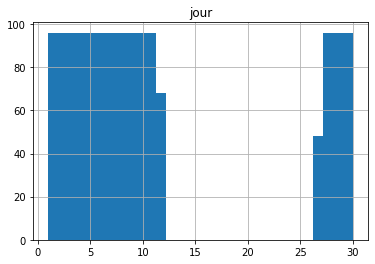

In [15]:
capteur_riviere['jour'] = capteur_riviere['dates'].apply(lambda x: x.day)
capteur_riviere.hist(column = ['jour'],bins=31)
plt.show()

# 5. Valeurs aberrantes

L'un des plus grands défis du nettoyage des données est l'identification et le traitement des valeurs aberrantes. En termes simples, les valeurs aberrantes sont des observations qui sont significativement différentes des autres points de données. Même les meilleurs algorithmes d'estimation des paramètres automatique seront moins performants si les observations aberrantes ne sont pas nettoyées des données, car elles impliquent des simulations obsolètes des variables.



In [16]:
print(capteur_riviere.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   #                                   1460 non-null   float64       
 1   dates                               1460 non-null   datetime64[ns]
 2   tension_V                           1460 non-null   float64       
 3   temperature_stream_C                1460 non-null   float64       
 4   Hôte connecté (LGR S/N: 10831978)   0 non-null      float64       
 5   Arrêté (LGR S/N: 10831978)          0 non-null      float64       
 6   Fin de fichier (LGR S/N: 10831978)  0 non-null      float64       
 7   diff_charge                         1460 non-null   float64       
 8   jour                                1460 non-null   int64         
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 102.8 KB
None


In [17]:
print(capteur_ZH.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   #                                   1438 non-null   int64         
 1   dates                               1438 non-null   datetime64[ns]
 2   temperature_depth_1_C               1436 non-null   float64       
 3   temperature_depth_2_C               1436 non-null   float64       
 4   temperature_depth_3_C               1436 non-null   float64       
 5   temperature_depth_4_C               1436 non-null   float64       
 6   Hôte connecté (LGR S/N: 10117166)   1 non-null      object        
 7   Arrêté (LGR S/N: 10117166)          1 non-null      object        
 8   Fin de fichier (LGR S/N: 10117166)  1 non-null      object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 101.2+ KB
None


## 5.1 Identification des valeurs aberrantes

La présence de valeurs aberrantes dans les données peut avoir de nombreuses raisons. Parfois, les valeurs aberrantes peuvent être authentiques, alors que dans d'autres cas, elles peuvent être dues à des erreurs de saisie de données. Il est important de comprendre les raisons des valeurs aberrantes avant de les nettoyer.

Nous allons commencer le processus de recherche des valeurs aberrantes en exécutant les statistiques sommaires sur les variables. Pour ce faire, nous utilisons la fonction describe() ci-dessous, qui fournit un résumé statistique de toutes les variables quantitatives.


In [18]:
capteur_riviere['diff_charge'].describe(include = '0')

count    1460.000000
mean       -0.016812
std         0.032176
min        -0.140099
25%        -0.025327
50%        -0.020557
75%        -0.009784
max         0.390494
Name: diff_charge, dtype: float64

In [19]:
capteur_ZH['temperature_depth_1_C'].describe(include = '0')

count    1436.000000
mean       14.717557
std         0.721799
min        13.329000
25%        14.146000
50%        14.625000
75%        15.127000
max        17.320000
Name: temperature_depth_1_C, dtype: float64

Tracez les graphiques de distribution pour les différentes variables

### 5.1.1 Box plot

Le box plot est une manière standardisée d'afficher la distribution des données sur la base du résumé en cinq chiffres (minimum, premier quartile (Q1), médiane, troisième quartile (Q3) et maximum). Elle est souvent utilisée pour identifier la distribution des données et détecter les valeurs aberrantes. La ligne de code ci-dessous trace le box plot de la variable numérique 'Loan_amount'. 

<AxesSubplot:>

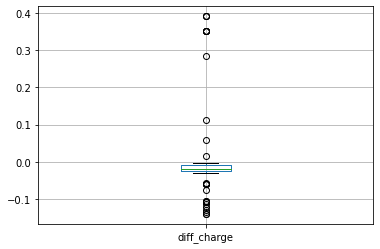

In [20]:
capteur_riviere.boxplot(column=['diff_charge'])

<AxesSubplot:>

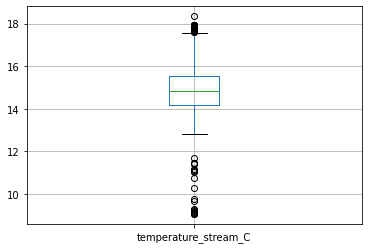

In [21]:
capteur_riviere.boxplot(column=['temperature_stream_C'])  

<AxesSubplot:>

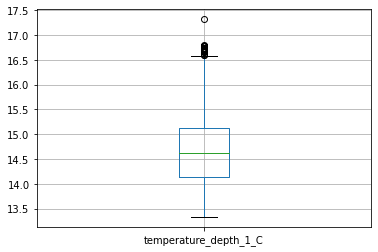

In [22]:
capteur_ZH.boxplot(column=['temperature_depth_1_C'])

<AxesSubplot:>

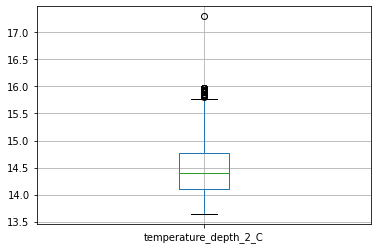

In [23]:
capteur_ZH.boxplot(column=['temperature_depth_2_C'])

<AxesSubplot:>

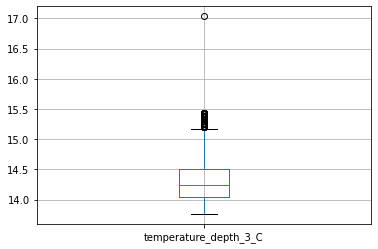

In [24]:
capteur_ZH.boxplot(column=['temperature_depth_3_C'])

<AxesSubplot:>

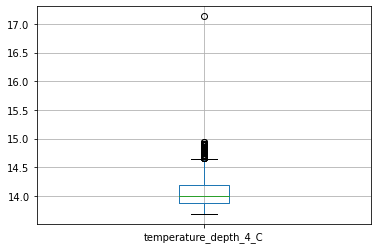

In [25]:
capteur_ZH.boxplot(column=['temperature_depth_4_C'])

### 5.1.2. Histogramme
Un histogramme est utilisé pour visualiser la distribution d'une variable numérique. Une valeur aberrante apparaît en dehors du modèle général de distribution. La ligne de code ci-dessous trace un histogramme de la variable 'Revenu', en utilisant la fonction hist(). A histogram is used to visualize the distribution of a numerical variable. An outlier will appear outside the overall pattern of distribution. The line of code below plots a histogram of the 'Income' variable, using the hist() function.

array([[<AxesSubplot:title={'center':'diff_charge'}>,
        <AxesSubplot:title={'center':'temperature_stream_C'}>]],
      dtype=object)

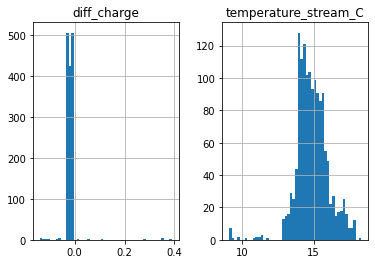

In [26]:
capteur_riviere.hist(column=['diff_charge','temperature_stream_C'],bins = 50) 

array([[<AxesSubplot:title={'center':'temperature_depth_1_C'}>,
        <AxesSubplot:title={'center':'temperature_depth_2_C'}>],
       [<AxesSubplot:title={'center':'temperature_depth_3_C'}>,
        <AxesSubplot:title={'center':'temperature_depth_4_C'}>]],
      dtype=object)

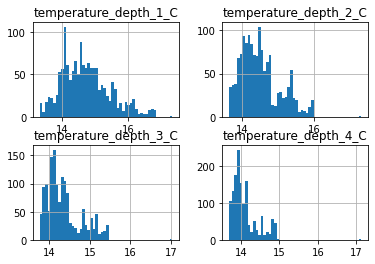

In [27]:
capteur_ZH.hist(column=['temperature_depth_1_C','temperature_depth_2_C','temperature_depth_3_C','temperature_depth_4_C'],bins = 50) 

In [28]:
#capteur_ZH = capteur_ZH.drop([1436, 1437])

In [29]:
# capteur_ZH['temperature_depth_1_C'] = capteur_ZH['temperature_depth_1_C'].dropna()
#print (capteur_ZH['temperature_depth_1_C'])

### 5.1.3Scatterplot

Un nuage de points permet de visualiser la relation entre deux variables quantitatives. Les données sont affichées sous la forme d'une collection de points, et tout point qui ne correspond pas au regroupement général des deux variables peut indiquer des valeurs aberrantes. 

génèrez un nuage de points entre les différentes variables de températures. 



<AxesSubplot:xlabel='temperature_depth_1_C', ylabel='temperature_depth_2_C'>

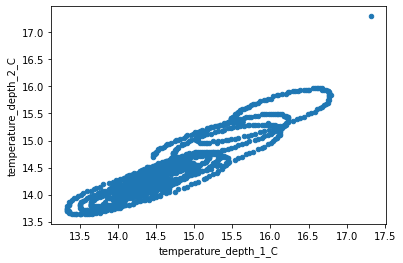

In [30]:
capteur_ZH.plot.scatter(x='temperature_depth_1_C',y='temperature_depth_2_C')

<AxesSubplot:xlabel='temperature_depth_1_C', ylabel='temperature_depth_3_C'>

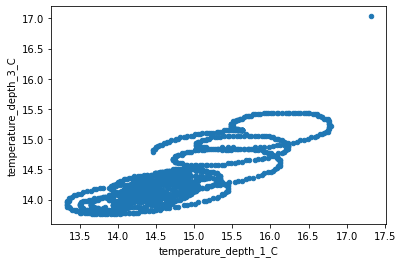

In [31]:
capteur_ZH.plot.scatter(x='temperature_depth_1_C',y='temperature_depth_3_C')

<AxesSubplot:xlabel='temperature_depth_1_C', ylabel='temperature_depth_4_C'>

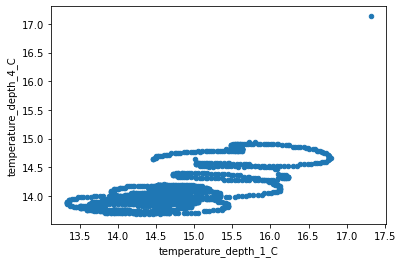

In [32]:
capteur_ZH.plot.scatter(x='temperature_depth_1_C',y='temperature_depth_4_C')

<AxesSubplot:xlabel='temperature_depth_2_C', ylabel='temperature_depth_3_C'>

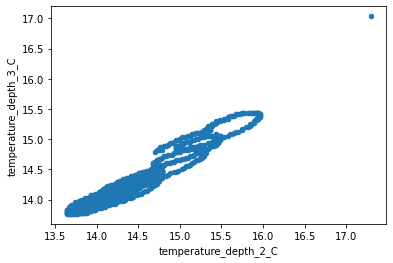

In [33]:
capteur_ZH.plot.scatter(x='temperature_depth_2_C',y='temperature_depth_3_C')

<AxesSubplot:xlabel='temperature_depth_2_C', ylabel='temperature_depth_4_C'>

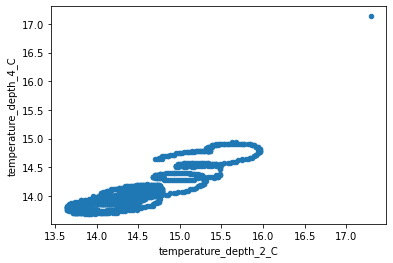

In [34]:
capteur_ZH.plot.scatter(x='temperature_depth_2_C',y='temperature_depth_4_C')

<AxesSubplot:xlabel='temperature_depth_3_C', ylabel='temperature_depth_4_C'>

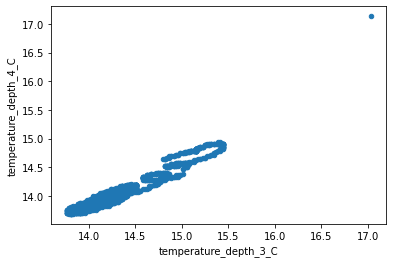

In [35]:
capteur_ZH.plot.scatter(x='temperature_depth_3_C',y='temperature_depth_4_C')

In [36]:
#rng = np.random.RandomState(0)
#colors = rng.rand(1436)
#plt.scatter(capteur_ZH['temperature_depth_2_C'],capteur_ZH['temperature_depth_1_C'],c = colors, alpha=0.5)
#plt.show()

## 5.2 Identification des valeurs aberrantes avec l'écart interquartile (IQR)

L'écart interquartile (IQR) est une mesure de la dispersion statistique et est calculé comme la différence entre les 75e et 25e percentiles. Il est représenté par la formule IQR = Q3 - Q1. Les  lignes de code ci-dessous calculent et impriment l'écart interquartile pour chacune des variables de l'ensemble de données.  La règle générale est que tout ce qui n'est pas dans la plage de (Q1 - 1,5 IQR) et (Q3 + 1,5 IQR) est une valeur aberrante et peut être supprimé.


### 5.2.1 Fonctions d'assistance

Ecrire des fonctions afin d'examiner chaque colonne des deux fichiers de données de terain et de calculer les 1er et 3e quartiles, l'intervalle inter-quartile et le minimum et le maximum. Toute valeur en dehors du minimum et du maximum est une valeur aberrante.

In [113]:
def Abe(df, columns):

    indices_abe = []
    for column in columns :

        # calcul des statistiques
        q25 = df.describe().loc['25%'][column]
        q75 = df.describe().loc['75%'][column]
        iqr = q75 - q25

        # repérage des lignes aberrantes
        valeurs_aberr = df[column].loc[ (df[column]<q25-1.5*iqr) | (df[column]>q75+1.5*iqr) ]

        # récupération des indices
        indices_abe += list(valeurs_aberr.index.values)

    return list(dict.fromkeys(indices_abe)) # retirer les indices en double

In [65]:
len(Abe(capteur_riviere, ['diff_charge']))

28

In [72]:
len(Abe(capteur_ZH, ['temperature_depth_1_C']))

26

In [73]:
len(Abe(capteur_ZH, ['temperature_depth_2_C']))

35

In [74]:
len(Abe(capteur_ZH, ['temperature_depth_3_C']))

72

In [75]:
len(Abe(capteur_ZH, ['temperature_depth_4_C']))

142

### 5.2.2 Résolution de la distribution asymétrique…

A partir de nos données dans un histogramme, nous pouvons obtenir une distribution asymétrique des données. Une seule grande barre avec de minuscules barres à gauche ou à droite (ou les deux) est un signe révélateur que des valeurs aberrantes peuvent être présentes dans les données et cela signifie que notre bel histogramme, bien rangé et normalement distribué, est complètement caché et obscurci par le seul grand bar.


Lorsque nous observons ce modèle, nous devons supprimer les valeurs aberrantes, puis voir à quoi ressemble la nouvelle distribution. Si nous voulons vérifier la présence de valeurs aberrantes, une boîte à moustaches rapide confirmera ou refusera…

In [76]:
capteur_riviere_s = capteur_riviere.drop(Abe(capteur_riviere, ['diff_charge']))


In [77]:
capteur_ZH_s = capteur_ZH.drop(Abe(capteur_ZH, ['temperature_depth_1_C','temperature_depth_2_C','temperature_depth_3_C','temperature_depth_4_C']))

In [78]:
# Removing the outliers
#def removeOutliers(data, col):
    #Q3 = np.quantile(data[col], 0.75)
    #Q1 = np.quantile(data[col], 0.25)
    #IQR = Q3 - Q1
     
    #print("IQR value for column %s is: %s" % (col, IQR))
    #global outlier_free_list
    #global filtered_data
     
    #lower_range = Q1 - 1.5 * IQR
    #upper_range = Q3 + 1.5 * IQR
    #outlier_free_list = [x for x in data[col] if (
        #(x > lower_range) & (x < upper_range))]
    
    #filtered_data = data.loc[data[col].isin(outlier_free_list)]
    
    #return filtered_data

#data1 = removeOutliers(capteur_riviere, 'diff_charge')
#data2 = removeOutliers(capteur_ZH, 'temperature_depth_1_C')
#data3 = removeOutliers(capteur_ZH, 'temperature_depth_2_C')
#data4 = removeOutliers(capteur_ZH, 'temperature_depth_3_C')
#data5 = removeOutliers(capteur_ZH, 'temperature_depth_4_C')
# Assigning filtered data back to our original variable
# data1 = filtered_data
#print("Shape of data after outlier removal is: ", data1.shape, data2.shape, data3.shape, data4.shape, data5.shape)



### 5.2.3 Suppression des valeurs aberrantes et visualisation du résultat

Après avoir fait tout le gros du travail dans les fonctions d'assistance, nous pouvons maintenant supprimer les lignes des données qui contiennent des valeurs aberrantes en dehors de | - et - | moustaches…



<AxesSubplot:>

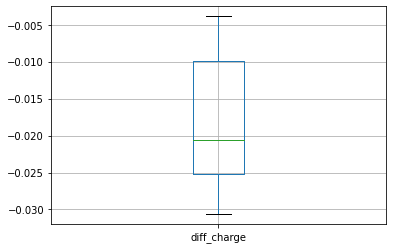

In [79]:
capteur_riviere_s.boxplot(column=['diff_charge'])

<AxesSubplot:>

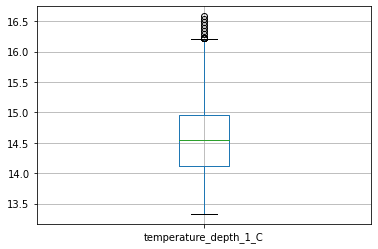

In [80]:
capteur_ZH_s.boxplot(column=['temperature_depth_1_C'])

<AxesSubplot:>

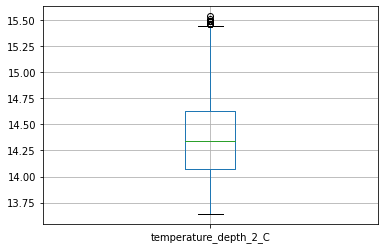

In [81]:
capteur_ZH_s.boxplot(column=['temperature_depth_2_C'])

<AxesSubplot:>

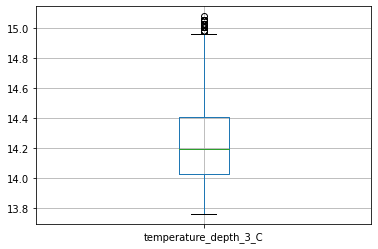

In [82]:
capteur_ZH_s.boxplot(column=['temperature_depth_3_C'])

<AxesSubplot:>

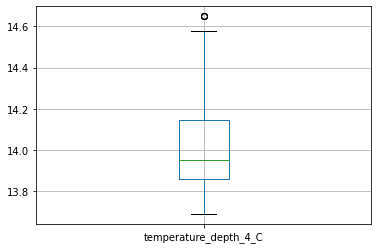

In [83]:
capteur_ZH_s.boxplot(column=['temperature_depth_4_C'])

### 5.2.4 Expliquez le résultat
est ce que cette méthodologie vous semble suffisante? Tentez de trouver les limites de cette méthodologie? Que pouvez vous apportez aux fonctions afin de les améliorer?

Cette méthodologie nous permet de supprimer des valeurs extrêmes en comparant la distance entre cette valeur et les 75 et 25 percentiles. 
Mais c'est aussi possible que nous supprimions trop de data, dont une partie puisse être utile mais se situe après Q3 + 1,5IQR ou avant Q1 - 1,5IQR.

## 5.3 Valeurs abérantes avec la méthode score Z 
Il s'agit d'une unité mesurée en écart-type. Fondamentalement, il s'agit d'une mesure de la distance entre le score brut et la moyenne. Il est compris entre -3 et +3, où 0 = moyenne et 1 = écart-type, c'est-à-dire une distribution normale.

Cette méthode suggère qu'en tout point de données il existe une relation entre l'écart-type et la moyenne. Le score Z permet de trouver la distribution des données où la moyenne est égale à 0 et l'écart-type à 1, c'est-à-dire une distribution normale. Vous devez vous demander en quoi cela peut nous aider à identifier les valeurs aberrantes ? En calculant le score Z, nous redimensionnons et centrons les données et recherchons les points de données qui sont trop éloignés de zéro. Ces points de données qui sont trop éloignés de zéro seront traités comme des valeurs aberrantes. Dans la plupart des cas, un seuil de 3 ou -3 est utilisé, c'est-à-dire que si la valeur du score Z est supérieure ou inférieure à 3 ou -3 respectivement, ce point de données sera identifié comme aberrant.

Formule pour le score Z = (Observation - Moyenne)/Écart-type

z = (X - μ) / σ

Ecrire des functions afin de pouvoir appliquer cette méthodologie aux données

In [84]:
dH = capteur_riviere['diff_charge'].tolist()
threshold = 3
outlier_dH = []
for i in dH:    
  z = (i-np.mean(dH))/np.std(dH)   
  if abs(z) > threshold:        
    outlier_dH.append(i)

print('outlier in dH is', outlier_dH) 

outlier in dH is [0.11249929196339141, 0.3517078991723048, 0.3517078991723048, 0.3517078991723048, 0.3517078991723048, 0.3517078991723048, 0.28333159703110106, -0.14009855760190615, -0.12188555448052808, -0.13544078167788598, 0.3904541786467646, 0.39031707048571107, 0.39049449331450714, -0.12983999535041124, -0.13942101682398902]


In [85]:
T1 = capteur_ZH['temperature_depth_1_C'].tolist()
threshold = 3
outlier_T1 = []
for i in T1:    
  z = (i-np.mean(T1))/np.std(T1)   
  if abs(z) > threshold:        
    outlier_T1.append(i)

print('outlier in temperature_depth_1_C is', outlier_T1) 

outlier in temperature_depth_1_C is []


In [86]:
T2 = capteur_ZH['temperature_depth_2_C'].tolist()
threshold = 3
outlier_T2 = []
for i in T2:    
  z = (i-np.mean(T2))/np.std(T2)   
  if abs(z) > threshold:        
    outlier_T2.append(i)

print('outlier in temperature_depth_2_C is', outlier_T2) 

outlier in temperature_depth_2_C is []


In [87]:
T3 = capteur_ZH['temperature_depth_2_C'].tolist()
threshold = 3
outlier_T3 = []
for i in T3:    
  z = (i-np.mean(T3))/np.std(T3)   
  if abs(z) > threshold:        
    outlier_T3.append(i)

print('outlier in temperature_depth_3_C is', outlier_T3) 

outlier in temperature_depth_3_C is []


In [88]:
T4 = capteur_ZH['temperature_depth_2_C'].tolist()
threshold = 3
outlier_T4 = []
for i in T4:    
  z = (i-np.mean(T4))/np.std(T4)   
  if abs(z) > threshold:        
    outlier_T4.append(i)

print('outlier in temperature_depth_4_C is', outlier_T4) 

outlier in temperature_depth_4_C is []


### 5.4 Comparer les deux méthodologies, donner leurs avantages et leurs limitations
Vous pouvez proposer des alternatives.

L'objectif principal de Z-Score est de convertir uniformément des données de différentes magnitudes en la même magnitude et d'utiliser les valeurs Z-Score calculées afin d'assurer la comparabilité entre les données. Par conséquent, on peut voir que Z-Score peut convertir efficacement les données en une norme unifiée. Mais Z-Score lui-même n'a aucune signification pratique, sa signification pratique doit être réalisée par comparaison, ce qui est également un désavantage de Z-Score.

L'intervalle interquartile, qui nous indique la distance entre le premier et le troisième quartile, indique à quel point la moitié médiane de notre ensemble de données est répartie. Le principal avantage de l'utilisation de l'intervalle interquartile plutôt que de l'intervalle pour la mesure de l'étalement d'un ensemble de données est que l'intervalle interquartile n'est pas sensible aux valeurs aberrantes.



## 6. Proposer une fonction permettant d'aller des données brutes jusqu'au premier traitement des données.

N'oubliez pas de permettre à l'utilisateur de pouvoir prendre des décisions et de l'aider à prendre ces décisions
Pensez à indiquer à l'utilisateur si le jeu de données est utilisable, quels sont les capteurs défaillant, quel semble être l'orientation des échanges nappe-rivière, les données de différence de charge semblent t'elles données les mêmes informations que les données du profils de température.

Votre function doit prendre en entrée, les trois fichiers et proposer au fur et à mesure de son dérouler des propositions à l'utilisateur.

In [106]:
def rename(data_riviere, data_ZH):
    data_riviere.rename(columns={'#': '#', list(data_riviere.columns)[1]: 'dates',list(data_riviere.columns)[2]: 'tension_V',
                                list(data_riviere.columns)[3]:'temperature_stream_C'}, inplace =  True)
    data_riviere.drop(columns=data_riviere.columns[4:7], inplace=True)
    data_riviere.dropna()
    data_ZH.rename(columns={'#': '#', list(data_ZH.columns)[1]: 'dates', list(data_ZH.columns)[2]: 'temperature_depth_1_C',
                           list(data_ZH.columns)[3]:'temperature_depth_2_C', list(data_ZH.columns)[4]:'temperature_depth_3_C',
                           list(data_ZH.columns)[5]:'temperature_depth_4_C'}, inplace =  True)
    data_ZH.drop(columns=data_ZH.columns[6:9], inplace=True)
    data_ZH.dropna()

In [125]:
def calculation_dH(data_riviere, data_etalonnage):
    #data_riviere['diff_charge'] = (data_riviere['tension_V'] - data_riviere['temperature_stream_C']*(0.001474) - 1.210344)/(-1.462495)
    data_riviere['diff_charge'] = (data_riviere.loc[1:, "tension_V"] - float(data_etalonnage.at[2, "P508"]) - float(data_etalonnage.at[4, "P508"]) * data_riviere.loc[1:, "temperature_stream_C"]) / float(data_etalonnage.at[3, "P508"])

In [126]:
def datechange(data_riviere, data_ZH):
    data_riviere.loc[1:, "dates"] = pd.to_datetime(data_riviere.loc[1:, "dates"])
    data_ZH.loc[1:, "dates"] = pd.to_datetime(data_ZH.loc[1:, "dates"])

In [127]:
def deleteAbe(data,columns):

    def Abe(data, columns):
        indices_abe = []
        for column in columns :
            # calcul des statistiques
            q25 = data.describe().loc['25%'][column]
            q75 = data.describe().loc['75%'][column]
            iqr = q75 - q25
            # repérage des lignes aberrantes
            valeurs_aberr = data[column].loc[ (data[column]<q25-1.5*iqr) | (data[column]>q75+1.5*iqr) ]
            # récupération des indices
            indices_abe += list(valeurs_aberr.index.values)
        return list(dict.fromkeys(indices_abe))

    return data.drop(Abe(data,columns))


In [145]:
def traitement(data_riviere, data_ZH, data_etalonnage):
    
    rename(data_riviere, data_ZH)
    calculation_dH(data_riviere, data_etalonnage)
    datechange(data_riviere, data_ZH)

    a = input("IQR ? (y or n)")
    if a == "y":
        data_riviere_s=data_riviere.drop(Abe(data_riviere,['diff_charge']))
        data_ZH_s=data_ZH.drop(Abe(capteur_ZH, ['temperature_depth_1_C','temperature_depth_2_C','temperature_depth_3_C','temperature_depth_4_C']))
        data_riviere_s.boxplot(column=['diff_charge'])
        data_ZH_s.boxplot(column=['temperature_depth_1_C'])
        data_ZH_s.boxplot(column=['temperature_depth_2_C'])
        data_ZH_s.boxplot(column=['temperature_depth_3_C'])
        data_ZH_s.boxplot(column=['temperature_depth_4_C'])

    else:
        b = input("Méthode Z ? (y or n)")
        if b == "y":
            dH = data_riviere['diff_charge'].tolist()
            T1 = data_ZH['temperature_depth_1_C'].tolist()
            T2 = data_ZH['temperature_depth_2_C'].tolist()
            T3 = data_ZH['temperature_depth_3_C'].tolist()
            T4 = data_ZH['temperature_depth_4_C'].tolist()
            threshold = 3
        
            for i in dH:
                outlier_dH = []    
                z = (i-np.mean(dH))/np.std(dH)   
                if abs(z) > threshold:        
                    outlier_dH.append(i)
                
            for i in T1:
                outlier_T1 = []
                z = (i-np.mean(T1))/np.std(T1)   
                if abs(z) > threshold:        
                    outlier_T1.append(i)

            for i in T2:
                outlier_T2 = []
                z = (i-np.mean(T2))/np.std(T2)   
                if abs(z) > threshold:        
                    outlier_T2.append(i)

            for i in T3:
                outlier_T3 = []
                z = (i-np.mean(T3))/np.std(T3)   
                if abs(z) > threshold:        
                    outlier_T3.append(i)

            for i in T4:
                outlier_T4 = []
                z = (i-np.mean(T4))/np.std(T4)   
                if abs(z) > threshold:        
                    outlier_T4.append(i)

            print('outlier in dH is', outlier_dH) 
            print('outlier in temperature_depth_1_C is', outlier_T1) 
            print('outlier in temperature_depth_2_C is', outlier_T2) 
            print('outlier in temperature_depth_3_C is', outlier_T3) 
            print('outlier in temperature_depth_4_C is', outlier_T4) 

    

## Deux autres jeux de données sont disponibles sur le répertoire github.
Votre rôle est de traiter et d'analyser ces données avec la méthodologie que vous avez développé

In [136]:
# read in our data
capteur_riviere1 = pd.read_csv("/Users/jiangxinbei/Desktop/MOLONARI_1D_RESOURCES-main/sampling_points/Point047/point047_P_measures.csv",header=1)
capteur_ZH1 = pd.read_csv("/Users/jiangxinbei/Desktop/MOLONARI_1D_RESOURCES-main/sampling_points/Point047/point047_T_measures.csv",header=1)

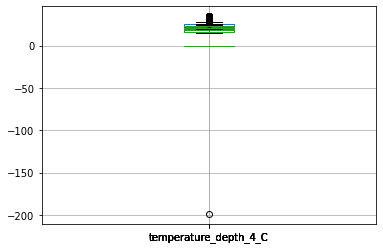

In [146]:
traitement(capteur_riviere1, capteur_ZH1, etalonage_capteur_riv)

In [142]:
traitement(capteur_riviere1, capteur_ZH1, etalonage_capteur_riv)

outlier in dH is []
outlier in temperature_depth_1_C is []
outlier in temperature_depth_2_C is []
outlier in temperature_depth_3_C is [-199.0]
outlier in temperature_depth_4_C is []
